In [1]:
name = '2017-07-14-questions-and-answers'
title = 'Questions and answers'
tags = 'Questions and answers'
author = 'Denis Sergeev'

In [2]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML, Image

html = connect_notebook_to_post(name, title, tags, author)

## List comprehensions

*Q: Why doesn't the list comprehension syntax make any sense to me / how can list comprehension be "more readable" than not using a list comprehension.*

List comprehensions are simply a way to compress a list-building for-loop into a single short, readable line.

For example, here is a loop that constructs a list of the first 12 square integers:

In [3]:
L = []
for n in range(12):
    L.append(n ** 2)
L

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]

Compare it with this:

In [4]:
L = [n ** 2 for n in range(12)]
L

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]

In [5]:
L = [n ** 0.5 for n in [11, 22, 33]]
L

[3.3166247903554, 4.69041575982343, 5.744562646538029]

As with many Python statements, you can almost read-off the meaning of this statement in plain English: "construct a list consisting of the square of n for each n up to 12".

This basic syntax, then, is `[expr for var in iterable]`, where `expr` is any valid expression, `var` is a variable name, and `iterable` is any iterable Python object.

### Multiple loops

In [6]:
[(i, j) for i in range(2) for j in range(3)]

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

In [7]:
L = []
for i in range(2):
    for j in range(3):
        if i == 0:
            L.append((i, j))
L

[(0, 0), (0, 1), (0, 2)]

### Conditionals

In [8]:
[val for val in range(20) if val % 3 == 0 and val != 0]

[3, 6, 9, 12, 15, 18]

In [9]:
[val if val % 2 else -val
 for val in range(20) if val % 3]

[1, -2, -4, 5, 7, -8, -10, 11, 13, -14, -16, 17, 19]

### Dictionary comprehension

In [10]:
d = {k: v for k, v in zip('abc', range(3))}
d

{'a': 0, 'b': 1, 'c': 2}

In [11]:
{k: v for k, v in d.items() if k in ['a', 'c']}

{'a': 0, 'c': 2}

## Keyword arguments in functions (kwargs)

*Q: How to optimise function interface with keyword arguments?*

In [12]:
def catch_all(*args, **kwargs):
    print("Positional (required) arguments:\t", args)
    print("Keyword (optional) arguments:\t", kwargs)
#     print(kwargs['pi'])

In [13]:
catch_all(1, 2, 3, a=4, b=5)

Positional (required) arguments:	 (1, 2, 3)
Keyword (optional) arguments:	 {'a': 4, 'b': 5}


In [14]:
catch_all('a', keyword=2)

Positional (required) arguments:	 ('a',)
Keyword (optional) arguments:	 {'keyword': 2}


In [15]:
inputs = (1, 2, 3)
keywords = {'pi': 3.14, 'e': 2.71}

catch_all(*inputs, **keywords)

Positional (required) arguments:	 (1, 2, 3)
Keyword (optional) arguments:	 {'pi': 3.14, 'e': 2.71}


In [16]:
def fun(a=1, pi=3, e=2):
    print(a, pi, e)

In [17]:
fun(**keywords)

1 3.14 2.71


In [18]:
class MyClass:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [19]:
data = dict(var=123)

In [20]:
a = MyClass(blahblah=456)

In [21]:
a.blahblah

456

## Cleaning up after model runs

*Q: What is the best way to delete unwanted files within Jupyter notebook workflow? Say I need to run the model multiple times and want to insure that every new model run uses only newly created files.*

### Method 1:
  - have a Makefile
  - run `make clean` from a terminal
  - or `make clean` using subprocess

Example of a Makefile
```
.PHONY: clean

clean:
    -rm *.pyc
```

### Method 2:

In [22]:
from path import Path
from tempfile import mkdtemp
import uuid

Aside: what is UUID?
* A universally unique identifier (UUID) is a 128-bit number used to identify information in computer systems.
* [UUID version 4](https://en.wikipedia.org/wiki/Universally_unique_identifier#Version_4_.28random.29)

In [23]:
class MockModel(object):
    """Mock model that generates empty files"""
    def __init__(self, workdir=None):
        """
        Initialise the model
        
        Kwargs:
            workdir: working directory path;
                     defaults to a temporary directory
        """
        if workdir is None:
            self.workdir = Path(mkdtemp())
        else:
            self.workdir = Path(workdir)  # .abspath()
            self.workdir.makedirs_p()

    def run(self, n, extensions=['tmp']):
        """
        Run the model
        
        Args:
            n: int, number of random files to generate
        """
        assert isinstance(n, int), 'n must be an integer!'
        
        self.files = []
        for ext in extensions:
            for _ in range(n):
                f = self.workdir / 'junk_{filename}.{ext}'.format(filename=uuid.uuid4(), ext=ext)
                with f.open('wb') as fout:
                    random_data = Path('/dev/urandom').open('rb').read(1024)
                    fout.write(random_data)
                self.files.append(f)
                    
    def show_results(self, pattern='*'):
        return [x for x in sorted(self.workdir.glob(pattern))
                if x.isfile()]

    def clean_all(self, pattern):
        for f in self.workdir.glob(pattern):
            f.remove()
            
    def purge(self):
        self.workdir.rmtree_p()

##### Initialise the object m

In [24]:
m = MockModel('such_folder_wow')

No results yet:

In [25]:
m.show_results()

[]

##### Run the model

In [26]:
m.run(2, extensions=['temp', 'pyc', 'out'])

In [27]:
m.show_results()

[Path('such_folder_wow/junk_5e9dc9d6-a556-41b3-8bb8-41e1212c9000.out'),
 Path('such_folder_wow/junk_640de6cf-0f66-479b-b868-5338952ee3bd.pyc'),
 Path('such_folder_wow/junk_7159a5aa-5755-4bc6-9652-98011a8fc3bb.temp'),
 Path('such_folder_wow/junk_848b35dc-498e-41c9-bceb-fdac4d4634b0.temp'),
 Path('such_folder_wow/junk_8b92b36b-22cd-4b69-a5f0-6cfbfb3728ca.out'),
 Path('such_folder_wow/junk_a1221d5d-1259-4021-9994-67730c7f5a80.pyc')]

##### Now, delete all *.pyc files in the working directory

In [28]:
m.clean_all('*.pyc')

##### Take-home code snippet (using path.py)

In [29]:
def clean_dir(dirname, pattern):
    d = Path(dirname)
    for file in d.glob(pattern):
        file.remove()

##### Or using `os` module:

In [30]:
import os
from glob import glob

def clean_dir(dirname, pattern):
    absdir = os.path.abspath(dirname)
    p = '{absdir}/{pattern}'.format(absdir=absdir, pattern=pattern)
    for file in glob(p):
        os.remove(file)

In [31]:
clean_dir('such_folder_wow', '*.so')

Remove the directory:

In [32]:
m.purge()

## Polar ~~stereoscopic~~ stereographic maps

*Q: What is the best way to create polar stereographic plots? I will be creating a lot soon and currently using cf plots to do this. What other ways are there?*

Let's have a look at cf-plot!

http://ajheaps.github.io/cf-plot/gallery.html

https://github.com/ajheaps/cf-plot/blob/master/cfplot/cfplot.py#L4803

We can see that under the hood it uses basemap library: https://matplotlib.org/basemap/

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
from mpl_toolkits.basemap import Basemap

In [35]:
fig, ax = plt.subplots()
mymap = Basemap(ax=ax, projection='npstere', boundinglat=60,
                round='True', lon_0=0, lat_0=90)
mymap.drawcoastlines()
mymap.drawmeridians(np.arange(-180, 181, 60), latmax=90);
mymap.drawparallels(np.arange(-90, 91, 5));

Now, let's try the same North Polar Stereographic projection plot with cartopy.

In [36]:
import cartopy.crs as ccrs

In [37]:
%matplotlib inline

In [38]:
plt.rcParams['figure.figsize'] = (8, 8)

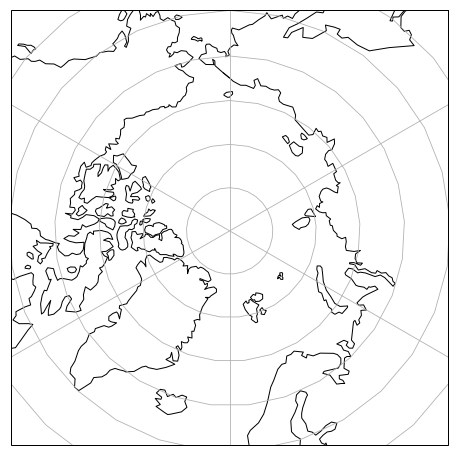

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.Stereographic(central_latitude=90))

ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
ax.gridlines()

ax.coastlines()

In [40]:
import matplotlib.path as mpath

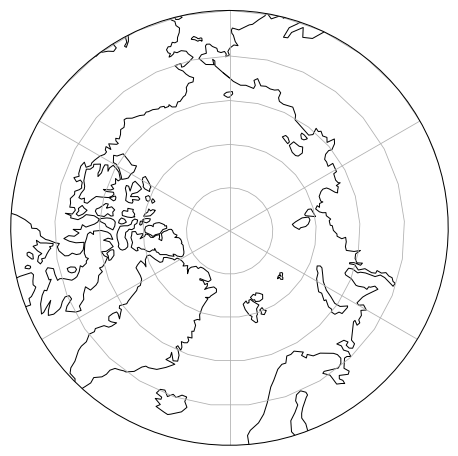

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.NorthPolarStereo())

ax.coastlines()

ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

ax.gridlines()

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

# References

* [A Whirlwind Tour of Python by Jake VanderPlas (O'Reilly Media, 2016)](https://github.com/jakevdp/WhirlwindTourOfPython)
* [Cartopy projections](http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)

In [42]:
HTML(html)